### Project 3
  


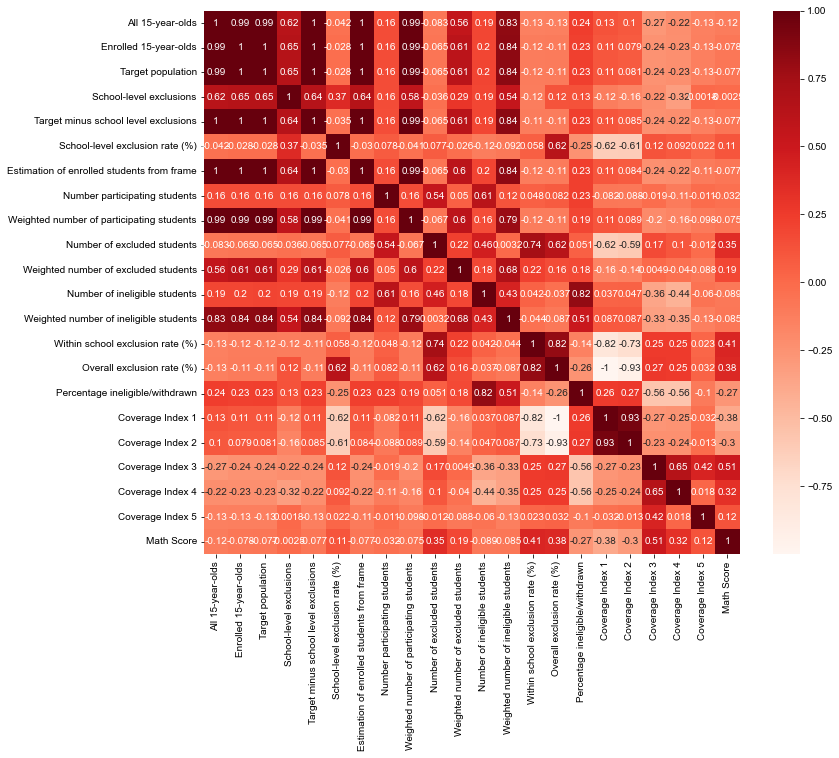

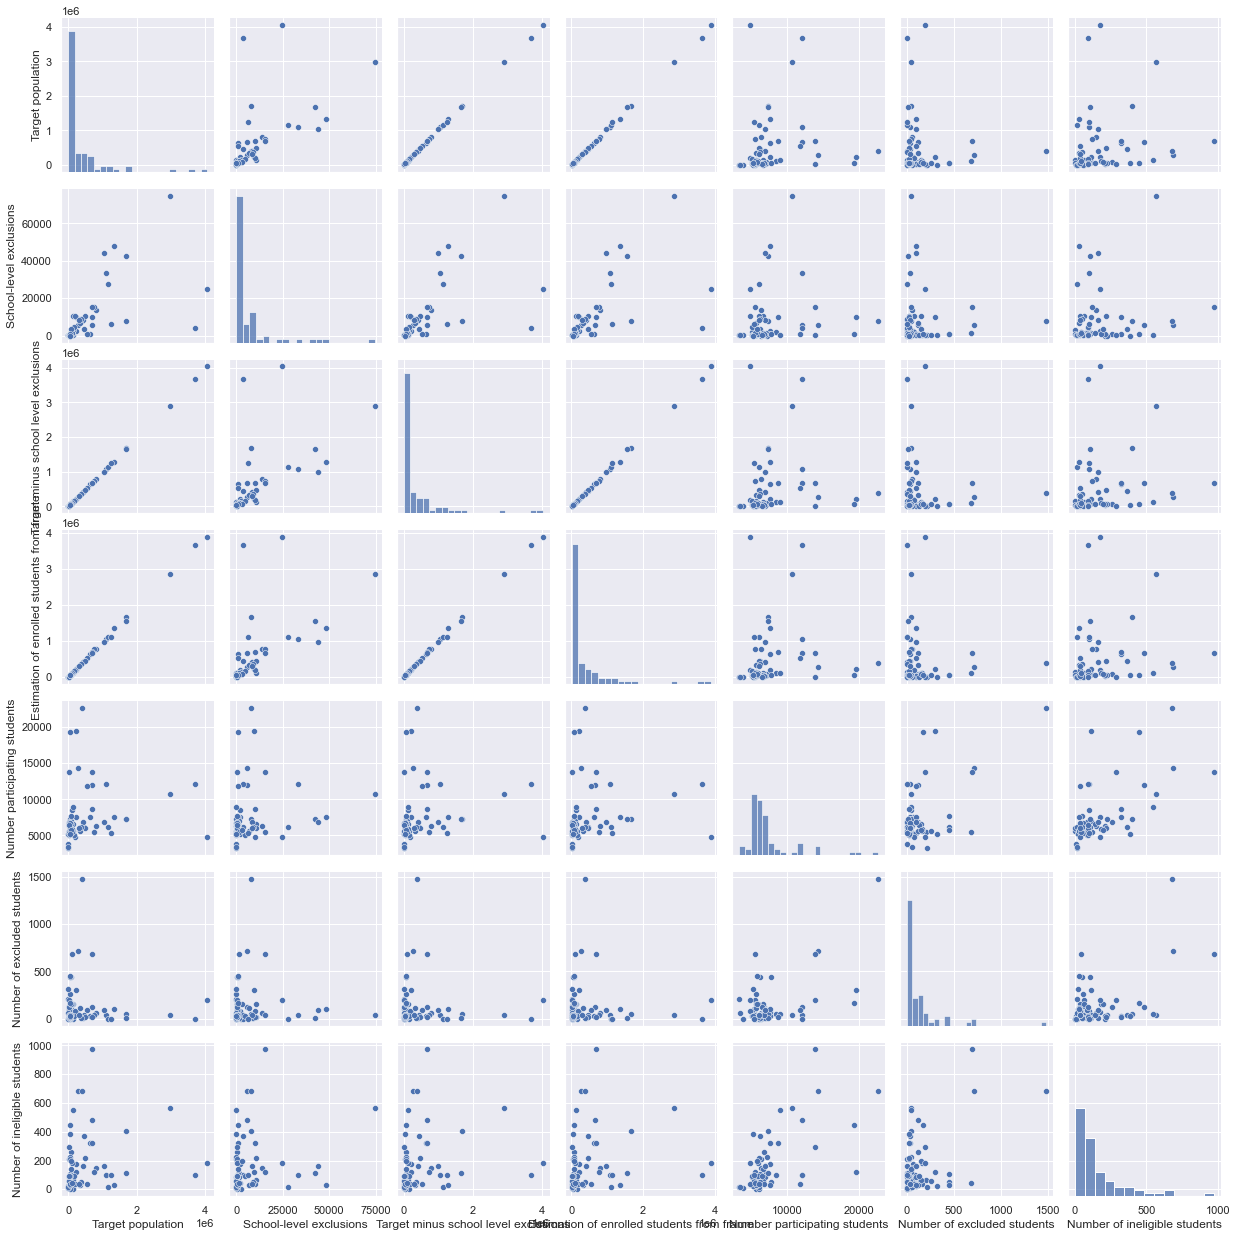

C:\Users\karrin3\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Math Score                                    1.000000
Coverage Index 3                              0.507403
Within school exclusion rate (%)              0.405195
Overall exclusion rate (%)                    0.384207
Number of excluded students                   0.354009
Coverage Index 4                              0.324564
Weighted number of excluded students          0.185266
Coverage Index 5                              0.118397
School-level exclusion rate (%)               0.114909
School-level exclusions                      -0.002538
Number participating students                -0.032332
Weighted number of participating students    -0.075429
Target population                            -0.076528
Estimation of enrolled students from frame   -0.076984
Target minus school level exclusions         -0.077323
Enrolled 15-year-olds                        -0.078493
Weighted number of ineligible students       -0.085328
Number of ineligible students                -0.089006
All 15-yea

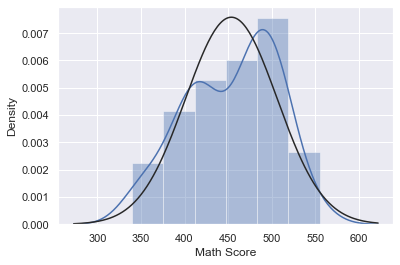

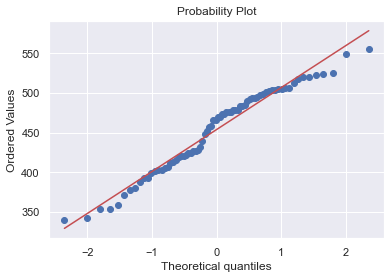

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv(r'C:\Users\karrin3\Downloads\Reading-PISA_TechReport.csv')
#print (df)
#data.head()
data.describe()
#print(data.columns)

plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
#plt.show()

sns.set()
cols = ['Target population', 'School-level exclusions',
       'Target minus school level exclusions',
       'Estimation of enrolled students from frame',
       'Number participating students',
       'Number of excluded students',
       'Number of ineligible students']
sns.pairplot(data[cols], height = 2.5)
plt.show()

from scipy.stats import norm
from scipy import stats

sns.distplot(data['Math Score'], fit=norm)
fig = plt.figure()
res = stats.probplot(data['Reading Score'], plot=plt)


features = data[['All 15-year-olds', 'Enrolled 15-year-olds',
       'Target population', 'School-level exclusions',
       'Target minus school level exclusions',
       'School-level exclusion rate (%)',
       'Estimation of enrolled students from frame',
       'Number participating students',
       'Weighted number of participating students',
       'Number of excluded students', 'Weighted number of excluded students',
       'Number of ineligible students',
       'Weighted number of ineligible students',
       'Within school exclusion rate (%)', 'Overall exclusion rate (%)',
       'Percentage ineligible/withdrawn', 'Coverage Index 1',
       'Coverage Index 2', 'Coverage Index 3', 'Coverage Index 4',
       'Coverage Index 5']]
output = data['Reading Score']


corr_Math_Score=cor["Reading Score"].sort_values(ascending=False)
print(corr_Math_Score)




In [43]:
# feature selection

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as sfs


reg = LinearRegression() 
feature_selector = sfs(reg, k_features=5, forward=True, verbose=2, scoring='neg_mean_squared_error')
feature_selector = feature_selector.fit(features, output)

feat_names = list(feature_selector.k_feature_names_)
print(feat_names)
final_features = data[['School-level exclusions','Number of excluded students', 'Within school exclusion rate (%)','Coverage Index 3']]


x_train, x_test, y_train, y_test = train_test_split(final_features, output, test_size = 0.3, random_state = 100)
mlr = LinearRegression() 
mlr.fit(x_train, y_train)

print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(final_features, mlr.coef_))





[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.0s finished

[2022-05-05 23:09:41] Features: 1/5 -- score: -2233.5826408278062[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished

[2022-05-05 23:09:41] Features: 2/5 -- score: -2005.8782706789734[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.0s finished

[2022-05-05 23:09:41] Features: 3/5 -- score: -1980.1850716276726[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

['School-level exclusion rate (%)', 'Number of excluded students', 'Weighted number of ineligible students', 'Within school exclusion rate (%)', 'Coverage Index 3']
Intercept:  262.7486590661477
Coefficients:


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.0s finished

[2022-05-05 23:09:41] Features: 4/5 -- score: -1965.1446239757665[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.0s finished

[2022-05-05 23:09:42] Features: 5/5 -- score: -1990.079783496869

[('School-level exclusions', 0.000293836622070601),
 ('Number of excluded students', 0.027987376891150717),
 ('Within school exclusion rate (%)', 11.671830786961888),
 ('Coverage Index 3', 187.3221097228345)]

In [44]:


y_pred_mlr= mlr.predict(x_test)

mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})

mlr_diff.head()




,Actual value,Predicted value
56,407,455.692384
40,525,428.249243
20,520,477.869706
55,492,451.246418
32,504,441.188295


In [48]:
#Evaluating the Model

from sklearn import metrics


rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))

print('Root Mean Square Error:', rootMeanSqErr)


Root Mean Square Error: 59.84292029746348


In [49]:
#Lasso Regression

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

x_train, x_test, y_train, y_test = train_test_split(features, output, test_size = 0.3, random_state = 100)


df = data.iloc[: , :-1]
X_numerical = df.iloc[: , 1:].astype('float64')

#print(X_numerical)
list_numerical = X_numerical.columns
scaler = StandardScaler().fit(x_train[list_numerical]) 


x_train[list_numerical] = scaler.transform(x_train[list_numerical])

x_test[list_numerical] = scaler.transform(x_test[list_numerical])

reg = Lasso(alpha=.2)
reg.fit(x_train, y_train)
pred_train_lasso= reg.predict(x_train)

print('R squared training set', round(reg.score(x_train, y_train)*100, 2))
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))


R squared training set 56.05
32.687031065859394


In [50]:
#Ridge Regression
import numpy as np

 
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=10)
ridge=ridge_model.fit(x_train , y_train)
ridge_predict = ridge.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,ridge_predict)))







33.41386332183417
